# Analysis of American Award Winning Movies 

## Overview

We are aiming to conduct analyses on American films that have received recognition in the Oscars and Golden Globes. We would like to explore what categorizes a critically acclaimed/Oscar winning film through analysis of a winning film’s directing, ensemble, and audience reception. In response to popular opinions that award shows often nominate films that are not necessarily box-office hits (but rather lauded as high culture), we plan to analyze the correlation between beloved films rated by the public and award winning movies. We are interested in answering questions such as: Is there a difference between films that win Oscars and films that win Golden Globes? Do award winning films favor a certain demographic range for casting? What genres frequent award show nominations the most? Is there a veritable difference between female and male representation in acclaimed movies and if so do they conform to certain stereotypical roles? Are award winning movies only focused on a collection of niche topical themes? In engaging with this study, we hope to better understand how art is judged and the consequences of award nominations/wins on film viewership.
 

## Data Collection

See **movie_analysis.py** for full source code.
The universal IMDb movie id was used to identify films from varying sources. Example: Contagion (2011), IMDb id: tt1598778, IMDb url: www.imdb.com/title/tt1598778/

The Oscars film nominations data was collected from a pre-exisiting data set on IMDb (BestPictureAcademyAwards.csv). Information on actors and their demographics was collected from a pre-exisiting data set on IMDb (Top1000Actors.csv). The Oscars data came with films' IMDb movie ids. 

The Golden Globes film nominations data was collected from a pre-existing dataset on Kaggle (GoldenGlobesDataRaw.csv). The films listed in this data set did not come with their unique IMDb ids, so a webscrape of IMDb was conducted to extract the ids for the relevant films. Conflicts were checked and resolved manually. (See **GoldenGlobesCleaning.py** and **GoldenGlobesScrape.py**). 

Once the nominated film for each id was collected, The Movie Database API (which collects information from IMDb) was used to collect all details about films. (See **movie_analysis.py**.) 

https://bechdeltest.com/ was scraped to collect the scores of films on the Bechdel test. 

Rotten Tomatoes ratings were obtained using an unofficial API: "rotten_tomato_client" (see acknowledgements for github repo). The titles had to be called in batches (Python logging was used) because the API frequently timed out. Ratings were obtained by checking for both title and year of a film. A value of -1 was placed where no ratings were present for the movie. 

All of the data was collected and written to csv files which are read into dataframes in this notebook.



## Data Format


<p>Our data is split into two primary data frames: movies and actors. 
The fields and corresponding details/types are listed below. The unifying unique ID used to identify films is the IMDb ID detailed above. Briefly summarized, our movie data frame holds items like the title of a movie, directors, budget, keywords associated with the plot summary (in the form of a list), and the year of release. Award years are typically one year after the release year and are also included in the dataframe. 
    
Most importantly, the movie dataframe holds a full cast list. The 'Cast' column is organized in a list of tuples where each tuple holds the actor's name and their respective rank of appearance in the movie. Lower numbers are associated with important roles (ie rank '1' is the main protagonist). In order to lookup cast information for a select actor: upon accessing an actor through the cast list (given a movie), the actor name is matched in the actor dataframe. Because of SAG protocol, we assume that full stage names for actors are unique and can serve as accurate IDs. </p>



**Movie DataFrame**  


| Fields       | Description                                |
|--------------|--------------------------------------------|
| ID           | unique IMDb id                             |
| Title        | Movie title                                |
| Cast         | List of tuples (actor name, rank in movie) |
| Budget       | Movie budget                               |
| Keywords     | List                                       |
| Bechdel Pass | T/F                                        |
| IMDb Rating  | # from 1- 10 (float)                       |
| Tomatometer  | # from 0- 100  (int, value of -1 if None)                            |
| Runtime      | mins                                       |
| Year         | Year of Release                            |
| Genres       | comma separated string                     |
| Num Votes    | IMDb votes                                 |
| Release Date | Full release date                          |
| Directors    | comma separated string                     |
| Award Year   | Year of Award Nom.(1yr after release)      |
| Oscar Winner | 1: won, 0: nominated, NaN: not nominated   |
| Golden Globes Winner | 1: won, 0: nominated, NaN: not nominated   |



**Actor DataFrame** 

| Fields     |  Description                                 |
|------------|----------------------------------------------|
| Actor name | string                                       |
| Gender     | 1 for female, 2 for male, 0 for undocumented |



## Descriptive Statistics

Running the following cells will construct all dataframes required. 

In [1]:
pip install rotten_tomatoes_client

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

We do not recommend running this cell. It constructs the dataframes from scratch and makes 4 API calls. Approx. 25 minutes.

In [1]:
from movie_analysis import MovieAnalyzer

## get dataframes
result = MovieAnalyzer().make_dataframes()
movies = result[0]
actors = result[1]

print("Completed")


KeyboardInterrupt: 

Quicker Alternative: The following cell creates the dataframes from a preconstructed csv. See movie_analysis.py for full source code.

In [2]:
import ast 
movies = pd.read_csv("movies.csv", converters={"Cast": ast.literal_eval, "Keywords": ast.literal_eval, "Genres": ast.literal_eval})
actors = pd.read_csv("actors.csv")

In [3]:
movies

,ID,Title,Cast,Budget,Keywords,Genres,Release Date,Runtime,Tomatometer,Bechdel Pass,IMDb Rating,Num Votes,Directors,Oscar Winner,Golden Globes Winner,Year,Award Year
0,tt0031210,Dark Victory,"[(Bette Davis, 1), (George Brent, 2), (Humphre...",0.0,"[brain tumor, best friend, blindness, melodram...","[Drama, Romance]",1939-04-20,104.0,87,True,7.5,9421.0,Edmund Goulding,0.0,NaN,1939.0,1940.0
1,tt0031381,Gone with the Wind,"[(Vivien Leigh, 10), (Clark Gable, 11), (Olivi...",4000000.0,"[southern usa, loss of loved one, marriage pro...","[Drama, Romance, War]",1939-12-15,233.0,-1,True,8.1,274948.0,"Sam Wood, George Cukor, Victor Fleming",1.0,NaN,1939.0,1940.0
2,tt0031385,"Goodbye, Mr. Chips","[(Robert Donat, 1), (Greer Garson, 2), (Terry ...",0.0,"[world war i, teacher, school, schoolteacher, ...","[Drama, Romance]",1939-07-28,114.0,82,False,7.9,9336.0,"Sam Wood, Sidney Franklin",0.0,NaN,1939.0,1940.0
3,tt0031593,Love Affair,"[(Irene Dunne, 1), (Charles Boyer, 2), (Maria ...",0.0,"[artist, madeira, orphanage, playboy, love, si...","[Drama, Romance]",1939-04-07,88.0,86,NaN,7.3,4081.0,Leo McCarey,0.0,NaN,1939.0,1940.0
4,tt0031679,Mr. Smith Goes to Washington,"[(James Stewart, 9), (Jean Arthur, 8), (Claude...",1500000.0,"[washington d.c., senate, senator, sightseeing...","[Comedy, Drama]",1939-10-19,129.0,95,False,8.1,101886.0,Frank Capra,0.0,NaN,1939.0,1940.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,tt7286456,Joker,"[(Joaquin Phoenix, 357), (Robert De Niro, 16),...",55000000.0,"[street gang, dc comics, clown, villain, socie...","[Crime, Thriller, Drama]",2019-10-02,122.0,68,True,NaN,NaN,NaN,NaN,0.0,2019.0,2020.0
601,tt7349662,BlacKkKlansman,"[(John David Washington, 11), (Adam Driver, 6)...",15000000.0,"[ku klux klan, based on novel or book, biograp...","[Crime, Drama, History, Comedy]",2018-07-30,135.0,96,True,7.5,182306.0,Spike Lee,0.0,0.0,2018.0,2019.0
602,tt7653254,Marriage Story,"[(Adam Driver, 3), (Scarlett Johansson, 2), (L...",19000000.0,"[new york city, parent child relationship, the...",[Drama],2019-11-06,137.0,95,False,NaN,NaN,NaN,NaN,0.0,2019.0,2020.0
603,tt8404614,The Two Popes,"[(Jonathan Pryce, 0), (Anthony Hopkins, 1), (S...",0.0,"[vatican, pope, based on a true story, catholi...","[Drama, Comedy, History]",2019-11-27,125.0,89,False,NaN,NaN,NaN,NaN,0.0,2019.0,2020.0


In [60]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 21 columns):
ID                       605 non-null object
Title                    604 non-null object
Cast                     605 non-null object
Budget                   604 non-null float64
Keywords                 605 non-null object
Genres                   605 non-null object
Release Date             604 non-null object
Runtime                  604 non-null float64
Tomatometer              605 non-null int64
Bechdel Pass             429 non-null object
IMDb Rating              464 non-null float64
Num Votes                464 non-null float64
Directors                464 non-null object
Oscar Winner             464 non-null float64
Golden Globes Winner     364 non-null float64
Year                     605 non-null float64
Award Year               605 non-null float64
no_of_females            605 non-null int64
no_of_males              605 non-null int64
no_of_toprank_females    605 non-nu

In [9]:
actors

,Name,Gender
0,Viggo Mortensen,2
1,Mahershala Ali,2
2,Linda Cardellini,1
3,Dimiter D. Marinov,2
4,Mike Hatton,0
...,...,...
17172,Paul Tinto,0
17173,Billy Postlethwaite,2
17174,Justin Edwards,2
17175,Jonny Lavelle,2


#### Here are some basics pulled from the data frame to complement the data visualizations below. 

In [7]:
conda install -c conda-forge wordcloud=1.6.0

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import random
from wordcloud import WordCloud, STOPWORDS
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

ModuleNotFoundError: No module named 'altair'

### Awards By Director

In [2]:
def split_by_director(df):
    director_count = {}
    for row in df['Directors']:
        if isinstance(row, str):
            directors = row.strip().split(',')
            for d in directors:
                d = d.strip()
                if d not in director_count.keys():
                    director_count[d] = 1
                else: 
                    director_count[d] += 1
    return director_count

director_count = split_by_director(movies)
directors = pd.DataFrame.from_dict(director_count, orient='index', columns=['Recognized Films'])
top_ten_directors = directors.nlargest(10,['Recognized Films'])
top_ten_directors

NameError: name 'movies' is not defined

Of all the directors that have had their films recognized either by nomination or award in the Oscars Best Picture category or the Golden Globes Best Motion Picture - Drama category, these 10 directors have had the most films recognized.

### Movies with Largest Female Cast: 

The following adds a column with the number of females per film to our movies data frame.

In [3]:
#function that iterates through cast list and counts females
def count_females(cast_list):
    female_count = 0
    male_count = 0
    for item in cast_list: 
        act_ser = actors[actors['Name']==item[0]]
        gender = act_ser["Gender"].tolist()
        if len(gender) > 0:
            if gender[0] == 1:
                female_count += 1
            elif gender[0] == 2: 
                male_count += 1
    return female_count, male_count

#get number of female cast members per movie
movies['no_of_females'] = movies.apply(lambda row: count_females(row['Cast'])[0],axis=1)
movies['no_of_males'] = movies.apply(lambda row: count_females(row['Cast'])[1],axis=1)
movies

,ID,Title,Cast,Budget,Keywords,Genres,Release Date,Runtime,Tomatometer,Bechdel Pass,IMDb Rating,Num Votes,Directors,Oscar Winner,Golden Globes Winner,Year,Award Year,no_of_females,no_of_males
0,tt0031210,Dark Victory,"[(Bette Davis, 1), (George Brent, 2), (Humphre...",0.0,"[brain tumor, best friend, blindness, melodram...","[Drama, Romance]",1939-04-20,104.0,87,True,7.5,9421.0,Edmund Goulding,0.0,NaN,1939.0,1940.0,11,25
1,tt0031381,Gone with the Wind,"[(Vivien Leigh, 10), (Clark Gable, 11), (Olivi...",4000000.0,"[southern usa, loss of loved one, marriage pro...","[Drama, Romance, War]",1939-12-15,233.0,-1,True,8.1,274948.0,"Sam Wood, George Cukor, Victor Fleming",1.0,NaN,1939.0,1940.0,41,63
2,tt0031385,"Goodbye, Mr. Chips","[(Robert Donat, 1), (Greer Garson, 2), (Terry ...",0.0,"[world war i, teacher, school, schoolteacher, ...","[Drama, Romance]",1939-07-28,114.0,82,False,7.9,9336.0,"Sam Wood, Sidney Franklin",0.0,NaN,1939.0,1940.0,5,23
3,tt0031593,Love Affair,"[(Irene Dunne, 1), (Charles Boyer, 2), (Maria ...",0.0,"[artist, madeira, orphanage, playboy, love, si...","[Drama, Romance]",1939-04-07,88.0,86,NaN,7.3,4081.0,Leo McCarey,0.0,NaN,1939.0,1940.0,9,14
4,tt0031679,Mr. Smith Goes to Washington,"[(James Stewart, 9), (Jean Arthur, 8), (Claude...",1500000.0,"[washington d.c., senate, senator, sightseeing...","[Comedy, Drama]",1939-10-19,129.0,95,False,8.1,101886.0,Frank Capra,0.0,NaN,1939.0,1940.0,20,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,tt7286456,Joker,"[(Joaquin Phoenix, 357), (Robert De Niro, 16),...",55000000.0,"[street gang, dc comics, clown, villain, socie...","[Crime, Thriller, Drama]",2019-10-02,122.0,68,True,NaN,NaN,NaN,NaN,0.0,2019.0,2020.0,16,60
601,tt7349662,BlacKkKlansman,"[(John David Washington, 11), (Adam Driver, 6)...",15000000.0,"[ku klux klan, based on novel or book, biograp...","[Crime, Drama, History, Comedy]",2018-07-30,135.0,96,True,7.5,182306.0,Spike Lee,0.0,0.0,2018.0,2019.0,3,23
602,tt7653254,Marriage Story,"[(Adam Driver, 3), (Scarlett Johansson, 2), (L...",19000000.0,"[new york city, parent child relationship, the...",[Drama],2019-11-06,137.0,95,False,NaN,NaN,NaN,NaN,0.0,2019.0,2020.0,17,21
603,tt8404614,The Two Popes,"[(Jonathan Pryce, 0), (Anthony Hopkins, 1), (S...",0.0,"[vatican, pope, based on a true story, catholi...","[Drama, Comedy, History]",2019-11-27,125.0,89,False,NaN,NaN,NaN,NaN,0.0,2019.0,2020.0,1,9


In [6]:
#get movie with largest female cast

#convert from string type to date type (for use later)
movies['Release Date'] = pd.to_datetime(movies['Release Date'], errors='coerce')

female_cast = movies[['no_of_females', 'Title', 'Release Date']]
print(female_cast.max())

no_of_females                     41
Release Date     2020-04-29 00:00:00
dtype: object


The film with the largest female cast is Gone With the Wind, 1939.

In [32]:
#top 10
top_ten = (female_cast.nlargest(10, ['no_of_females']))
print(top_ten)

     no_of_females                            Title Release Date
1               41               Gone with the Wind   1939-12-15
582             32                       La La Land   2016-11-29
270             30                       Annie Hall   1977-04-19
586             29                        Lady Bird   2017-09-08
418             28               As Good as It Gets   1997-12-19
420             27                          Titanic   1997-11-18
532             26               The Social Network   2010-10-01
118             25  Around the World in Eighty Days   1956-10-17
547             25                       The Artist   2011-10-08
73              24                    The Snake Pit   1948-11-04


With the exception of a few more recent films (La La Land, Lady Bird, Annie Hall), the majority of the films above still have starring roles occupied by men. See data visualizations below for a more refined take on this.

In [54]:
#average number of females/movie
print(female_cast.mean())

no_of_females    7.231405
dtype: float64


In [55]:
# smallest amount of females/movie
print(female_cast.min())

no_of_females                      0
Release Date     1939-03-03 00:00:00
dtype: object


In [49]:
#winning vs nominated: female cast count
print(">>>OSCAR NOMINATED STATS>>>")
nominated = movies[movies['Oscar Winner'] == 0]
nominated_final = nominated[['Title', 'Release Date', 'no_of_females']]
print(nominated_final.max())
print(nominated_final.min())
print(nominated_final.mean())
print(">>>OSCAR WINNER STATS>>>")
winner = movies[movies['Oscar Winner'] == 1]
winner_final = winner[['Title', 'Release Date','no_of_females']]
print(winner_final.max())
print(winner_final.min())
print(winner_final.mean())

>>>OSCAR NOMINATED STATS>>>
Title                           卧虎藏龙
Release Date     2018-12-25 00:00:00
no_of_females                     32
dtype: object
Title                   12 Angry Men
Release Date     1939-03-03 00:00:00
no_of_females                      0
dtype: object
no_of_females    7.524804
dtype: float64
>>>OSCAR WINNER STATS>>>
Title                West Side Story
Release Date     2018-11-16 00:00:00
no_of_females                     41
dtype: object
Title               12 Years a Slave
Release Date     1939-12-15 00:00:00
no_of_females                      0
dtype: object
no_of_females    8.296296
dtype: float64


### Mean IMDb Ratings For Oscar Winning vs Nominated Films

In [57]:
#get mean for winners
winner_ratings = winner[['IMDb Rating','Title', 'Release Date']]
print(winner_ratings.mean())
print(winner_ratings.std())
print(">>>>>")
#get mean for nominated 
nominated_ratings = nominated[['IMDb Rating','Title', 'Release Date']]
print(nominated_ratings.mean())
print(nominated_ratings.std())

IMDb Rating    7.869136
dtype: float64
IMDb Rating    0.536107
dtype: float64
>>>>>
IMDb Rating    7.613316
dtype: float64
IMDb Rating    0.464223
dtype: float64


The mean for ratings of Oscar winning movies is slightly higher than nominated films. (However, standard deviation is also higher.)



## Data Analysis, Visualizations, and Insights

### Preliminary Graphs 

#### Analyzing Gender Over Time:

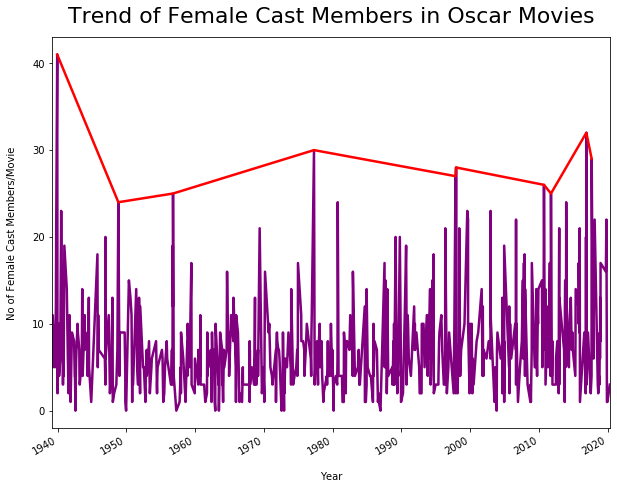

In [34]:
#graph female cast member total based on release date: 

#import graph libs
import matplotlib.dates as mdates
%matplotlib inline

#convert from string type to date type - this is already done in descriptive stats, 
#only uncomment and run this if you run cells out of order
#movies['Release Date'] = pd.to_datetime(movies['Release Date'])


graph_movies = movies[['Release Date', 'no_of_females']]
#print (graph_movies)

#plot data
graph_movies.set_index('Release Date')['no_of_females'].plot(figsize=(10, 8), linewidth=2.5, color='purple');
top_ten.set_index('Release Date')['no_of_females'].plot(figsize=(10, 8), linewidth=2.5, color='red');
#print(top_ten)

#styling 
plt.xlabel("Year", labelpad=15)
plt.ylabel("No of Female Cast Members", labelpad=15)
plt.title("Trend of Female Cast Members in Oscar Movies", y=1.02, fontsize=22);


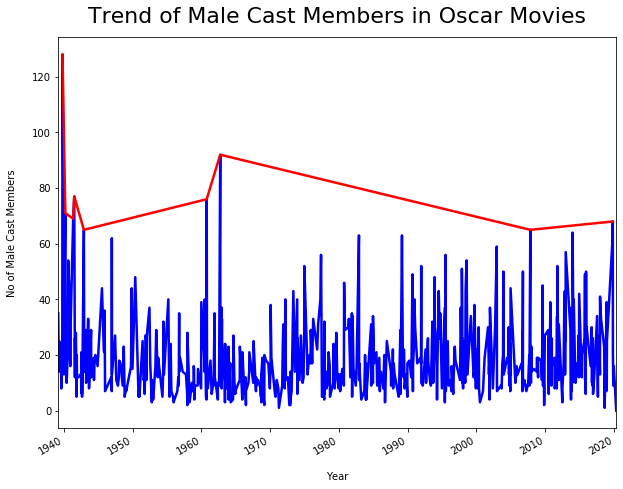

In [52]:
#import scipy.stats

graph_male_movies = movies[['Release Date', 'no_of_males']]
male_cast = movies[['no_of_males', 'Title', 'Release Date']]
top_ten_male = (male_cast.nlargest(10, ['no_of_males']))

#remove outlier
top_ten_male = top_ten_male.drop([118])
graph_male_movies = graph_male_movies.drop([118])

#print (graph_movies)
#print (top_ten_male)

#plot data
graph_male_movies.set_index('Release Date')['no_of_males'].plot(figsize=(10, 8), linewidth=2.5, color='blue');
top_ten_male.set_index('Release Date')['no_of_males'].plot(figsize=(10, 8), linewidth=2.5, color='red');

#styling 
plt.xlabel("Year", labelpad=15)
plt.ylabel("No of Male Cast Members", labelpad=15)
plt.title("Trend of Male Cast Members in Oscar Movies", y=1.02, fontsize=22);

Graphs Above: Red line denotes trend line for ten highest female/male cast movies (neglecting outlier).  

### Are there disparate levels of female cast members between nominees and winners?

/Users/Maitreyi/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


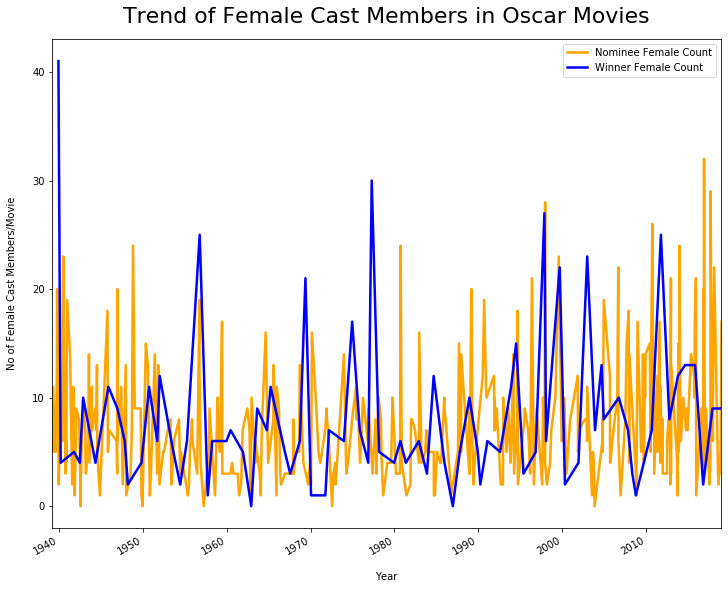

In [59]:
#dfs
nominated.rename(columns = {'no_of_females':'Nominee Female Count'}, inplace = True) 
nominated_graph = nominated[['Release Date', 'Nominee Female Count']]
winner.rename(columns = {'no_of_females':'Winner Female Count'}, inplace = True) 
winner_graph = winner[['Release Date', 'Winner Female Count']]

#plot data
nominated_graph.set_index('Release Date')['Nominee Female Count'].plot(figsize=(12, 10), linewidth=2.5, color='orange', legend = True);
winner_graph.set_index('Release Date')['Winner Female Count'].plot(figsize=(12, 10), linewidth=2.5, color='blue', legend = True);

#styling 
plt.xlabel("Year", labelpad=15)
plt.ylabel("No of Female Cast Members/Movie", labelpad=15)
plt.title("Trend of Female Cast Members in Oscar Movies", y=1.02, fontsize=22);

/Users/Maitreyi/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


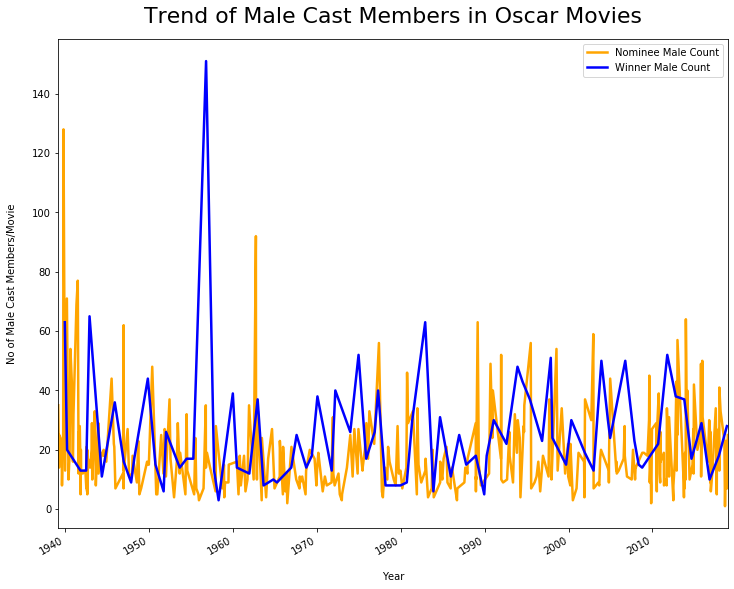

In [61]:
#dfs
nominated.rename(columns = {'no_of_males':'Nominee Male Count'}, inplace = True) 
nominated_graph_m = nominated[['Release Date', 'Nominee Male Count']]
winner.rename(columns = {'no_of_males':'Winner Male Count'}, inplace = True) 
winner_graph_m = winner[['Release Date', 'Winner Male Count']]

#plot data
nominated_graph_m.set_index('Release Date')['Nominee Male Count'].plot(figsize=(12, 10), linewidth=2.5, color='orange', legend = True);
winner_graph_m.set_index('Release Date')['Winner Male Count'].plot(figsize=(12, 10), linewidth=2.5, color='blue', legend = True);

#styling 
plt.xlabel("Year", labelpad=15)
plt.ylabel("No of Male Cast Members/Movie", labelpad=15)
plt.title("Trend of Male Cast Members in Oscar Movies", y=1.02, fontsize=22);

In the graph above, it seems that recently (2005+) films selected as Oscar winners have significantly lower amounts of female cast members compared to their nominated counterparts. 

--------------------------------------------------------------------------------------------------------

As you may recall,  Gone with the Wind is the movie with the highest number of female cast members.

Interestingly, there seem to be periodical increases every decade. One of the first peaks is right before 1950, likely reflecting the increase in women in the workforce (which had reached almost 50% of households after the Great Depression). The largest sharp increase is at the onset of 1980. The late 1970s brought a new era in Hollywood with economic "stagflation" peaking in 1978, driving lavish consumerism amongst the rich (see note below). The Hollywood sign was constructed, ladies like Jane Fonda reigned, and musical films like *Grease* with leading female roles enjoyed wild success. Unsurprisingly, the largest increases are very recent, in light of the *Me Too* movement and other campaigns advocating for gender equality in Hollywood.

However, some of these peaks may be misleading. Some movies have large female ensembles while still featuring a male lead. We can filter for major female roles using the IMDb character rankings in the Cast column of our movies dataframe. Check out the next graph!

Note: Another caveat to point out- by 1978, great income inequality had caused a major riff in America (Hollywood represented a wealthy population likely unaffected by the recession in the 80s). The newly formed socioeconomic divisions are a compelling foundation for examining how this polarizes film viewership >>> *see graph below!* 

### Female Leads

The following graph demonstrates the cumulative number of female leads vs total female cast members for the given time period (intervals in years). The number of movies/time period is equivalent. The visualization is meant to demonstrate the lack of primary female characters in movies despite supposed peaks in overall female casting.

In [55]:
#female roles based on ranking - modify to only count female actor if role is ranked 5 or lower.

def count_females_rankbased(cast_list):
    female_count = 0
    male_count = 0
    for item in cast_list: 
        act_ser = actors[actors['Name']==item[0]]
        if item[1] <= 5:
            if (act_ser["Gender"].tolist()[0]) == 1:
                female_count += 1
            elif (act_ser["Gender"].tolist()[0]) == 2:
                male_count += 1
    return female_count, male_count

#get number of female cast members per movie
movies['no_of_toprank_females'] = movies.apply(lambda row: count_females_rankbased(row['Cast'])[0],axis=1)
                
#get number of top rank males for given movie (5 - no of top rank females)
#movies['no_of_toprank_males'] = movies.apply(lambda row: 5-(count_females_rankbased(row['Cast'])),axis=1)

movies['no_of_toprank_males'] = movies.apply(lambda row: count_females_rankbased(row['Cast'])[1],axis=1)

movies.head()

,ID,Title,Cast,Budget,Keywords,Genres,Release Date,Runtime,Tomatometer,Bechdel Pass,...,Num Votes,Directors,Oscar Winner,Golden Globes Winner,Year,Award Year,no_of_females,no_of_males,no_of_toprank_females,no_of_toprank_males
0,tt0031210,Dark Victory,"[(Bette Davis, 1), (George Brent, 2), (Humphre...",0.0,"[brain tumor, best friend, blindness, melodram...","[Drama, Romance]",1939-04-20,104.0,87,True,...,9421.0,Edmund Goulding,0.0,NaN,1939.0,1940.0,11,25,2,3
1,tt0031381,Gone with the Wind,"[(Vivien Leigh, 10), (Clark Gable, 11), (Olivi...",4000000.0,"[southern usa, loss of loved one, marriage pro...","[Drama, Romance, War]",1939-12-15,233.0,-1,True,...,274948.0,"Sam Wood, George Cukor, Victor Fleming",1.0,NaN,1939.0,1940.0,41,63,0,0
2,tt0031385,"Goodbye, Mr. Chips","[(Robert Donat, 1), (Greer Garson, 2), (Terry ...",0.0,"[world war i, teacher, school, schoolteacher, ...","[Drama, Romance]",1939-07-28,114.0,82,False,...,9336.0,"Sam Wood, Sidney Franklin",0.0,NaN,1939.0,1940.0,5,23,1,1
3,tt0031593,Love Affair,"[(Irene Dunne, 1), (Charles Boyer, 2), (Maria ...",0.0,"[artist, madeira, orphanage, playboy, love, si...","[Drama, Romance]",1939-04-07,88.0,86,NaN,...,4081.0,Leo McCarey,0.0,NaN,1939.0,1940.0,9,14,1,1
4,tt0031679,Mr. Smith Goes to Washington,"[(James Stewart, 9), (Jean Arthur, 8), (Claude...",1500000.0,"[washington d.c., senate, senator, sightseeing...","[Comedy, Drama]",1939-10-19,129.0,95,False,...,101886.0,Frank Capra,0.0,NaN,1939.0,1940.0,20,128,0,0


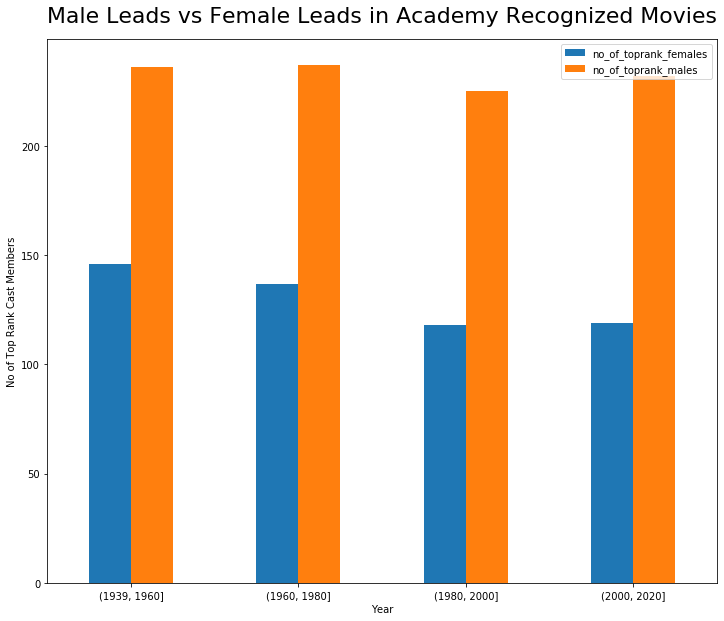

In [17]:
fem_graph=movies[['Award Year','no_of_toprank_females','no_of_toprank_males']]

#fem_graph=fem_graph.set_index('Award Year')

bins = pd.cut(fem_graph['Award Year'], [1939, 1960, 1980, 2000,2020])
#print(bins)
new = fem_graph.groupby(bins)['no_of_toprank_females','no_of_toprank_males'].sum()
#print(new)
ax = new.plot.bar(rot=0, figsize=(12,10), legend=True)

#styling 
plt.xlabel("Year")
plt.ylabel("No of Top Rank Cast Members")
plt.title("Male Leads vs Female Leads in Academy Recognized Movies", y=1.02, fontsize=22);

Women may have been plentiful in Hollywood, but in this appalling representation it's apparent that they never frequently had starring roles in Academy lauded films.

#### Rotten Tomatoes (Critic Scores) vs IMDb (public scores)

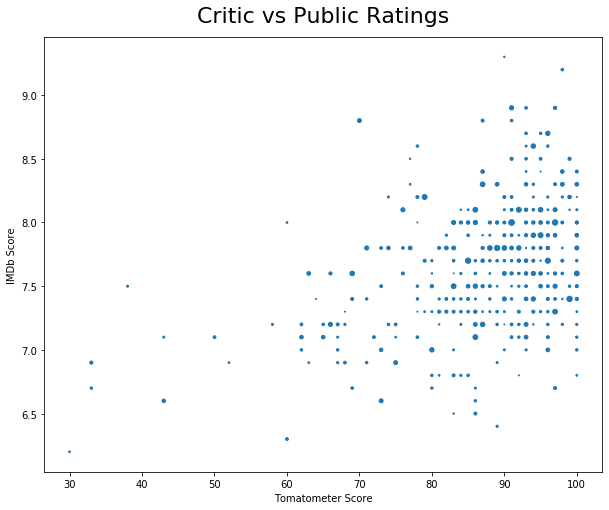

In [44]:
plt.figure(figsize=(10,8))
#remove -1s from set
temp_set = movies[movies['Tomatometer']!= -1]
plt.scatter(temp_set['Tomatometer'], temp_set['IMDb Rating'], s=temp_set['no_of_females'])
#styling 
plt.xlabel("Tomatometer Score")
plt.ylabel("IMDb Score")
plt.title("Critic vs Public Ratings", y=1.02, fontsize=22);

Tomatometer scale out of 100, IMDb out of 10.Size of points correlates to number of women in the film. A heavier density on the lower right of the plot indicates a disparity in acclaimed movies that critics favored but the public did not. Films in the 80-100 range on the critic scale primarily ranged from 7 to 8 on the IMDb scale.

## Major Topics in Nominated Films

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(['based', 'novel', 'book', 'story', 'true'])

def count_keywords(df):
    word_count = {}
    for row in df['Keywords']:
        for kwd in row:
            kwd = kwd.strip()
            if kwd not in word_count.keys():
                word_count[kwd] = 1
            else: 
                word_count[kwd] += 1
    return word_count

def split_keywords(df):
    text = ""
    for row in df['Keywords']:
        for kwd in row:
            kwd = kwd.strip()
            text += kwd + " "
    return text
# topics of all recognized films
text = split_keywords(movies)
keyword_cloud = WordCloud(stopwords=stopwords, max_font_size=60, relative_scaling=1, max_words=400, background_color="white", colormap='viridis').generate(text)
plt.imshow(keyword_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Keywords of Recognized Films")
plt.figure()

# topics of Oscar-recognized films
oscar_films = movies[movies['Oscar Winner'] <= 1.0]
oscar_text = split_keywords(oscar_films)
oscar_cloud = WordCloud(stopwords=stopwords, max_font_size=60, relative_scaling=1, max_words=400, background_color="white", colormap='magma').generate(oscar_text)
plt.imshow(oscar_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Keywords of Oscar Recognized Films")
plt.figure()

# topics of Golden Globes-recognized films
gg_films = movies[movies['Golden Globes Winner'] <= 1.0]
gg_text = split_keywords(gg_films)
gg_cloud = WordCloud(stopwords=stopwords, max_font_size=60, relative_scaling=1, max_words=400, background_color="white", colormap='cividis').generate(gg_text)
plt.imshow(gg_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Keywords of Golden Globes Recognized Films")
plt.figure()


Themes that appear to be common across recognized films in general include: love, biographical films, New York settings, and family. However, murder and World War topics seem to be relatively more common among Oscar-recognized films than among Golden Globes-recognized films. Relationship themes are relatively more common among Golden Globes films compared to Oscar films.

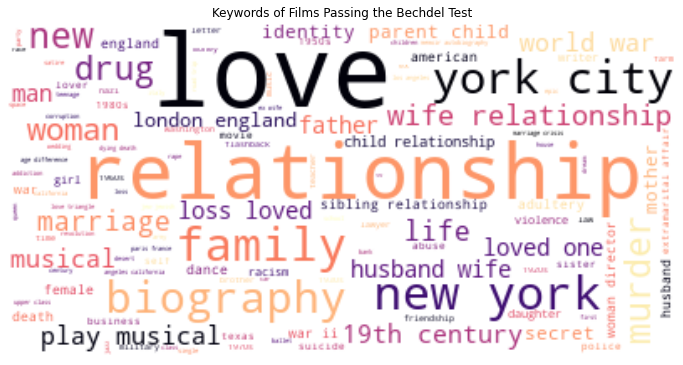

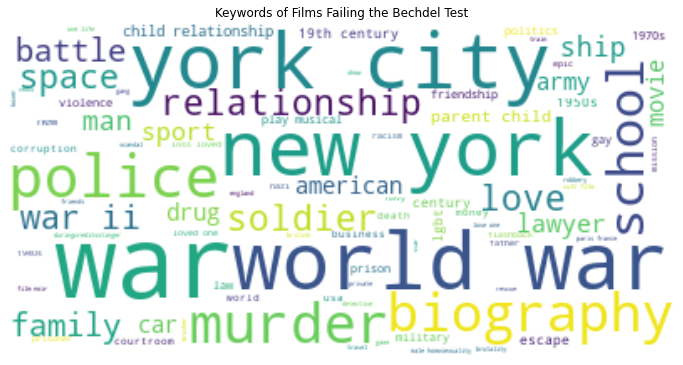

<Figure size 864x648 with 0 Axes>

In [24]:
stopwords = set(STOPWORDS)
stopwords.update(['based', 'novel', 'book', 'story', 'true'])

# creates wordclouds of the keywords of films that pass the bechdel test and of films that don't
def bechdel_keywords_cloud(df):
    # divide full movie data into two data frames, one for films that pass the bechdel test, one for those that fail
    # films with no bechdel scores are not included
    bechdel_pass = df[df['Bechdel Pass'] == True] # all the films that pass the Bechdel test
    bechdel_fail = df[df['Bechdel Pass'] == False] # all the films that fail the Bechdel test)
    
    pass_keywords = []
    for row in bechdel_pass['Keywords']:
        for word in row:
            pass_keywords.append(word)
    pass_text = " ".join(pass_keywords)

    # generate a word cloud of keywords of all films that pass the Bechdel Test
    pass_keyword_cloud = WordCloud(stopwords=stopwords, max_font_size=60, relative_scaling=1, max_words=400, background_color="white", colormap='magma').generate(pass_text)
    plt.imshow(pass_keyword_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Keywords of Films Passing the Bechdel Test")
    plt.figure()

    fail_keywords = []
    for row in bechdel_fail['Keywords']:
        for word in row:
            fail_keywords.append(word)
    fail_text = " ".join(fail_keywords)

    # generate a word cloud of keywords of all films that fail the Bechdel Test
    fail_keyword_cloud = WordCloud(stopwords=stopwords, max_font_size=60, max_words=400, background_color="white", relative_scaling=1).generate(fail_text)
    plt.imshow(fail_keyword_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Keywords of Films Failing the Bechdel Test")
    plt.figure()

    plt.show()

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 9)
bechdel_keywords_cloud(movies)


Themes that appear to be common across recognized films in general include: love, biographical films, New York settings, and family. However, murder and World War topics seem to be relatively more common among Oscar-recognized films than among Golden Globes-recognized films. Relationship themes are relatively more common among Golden Globes films compared to Oscar films.

## The Bechdel Test for Films:

The Bechdel Test is a rudimentary method to evaluate the representation of women in film. The three criteria a film must fulfill in order to pass the Bechdel Test are: 
1. The film must have at least two women in it
2. Two women must talk to each other
3. The two women must speak to each other about something other than a man

While these are not very demanding criteria, they serve as a potential baseline for measuring the involvement and representation of women in films, especially given that many films do not pass this test.

For context, among a database of 8076 films, 57.6% passed the Bechdel Test. This is compared to our data set of 425 recognized films, of which 53.6% pass the Bechdel Test. Thus, the proportion of films passing the test is similar among recognized films and films in general.

### Analyzing Topics of Films In Relation to Bechdel Scores:

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(['based', 'novel', 'book', 'story', 'true'])

# creates wordclouds of the keywords of films that pass the bechdel test and of films that don't
def bechdel_keywords_cloud(df):
    # divide full movie data into two data frames, one for films that pass the bechdel test, one for those that fail
    # films with no bechdel scores are not included
    bechdel_pass = df[df['Bechdel Pass'] == True] # all the films that pass the Bechdel test
    bechdel_fail = df[df['Bechdel Pass'] == False] # all the films that fail the Bechdel test)
   
    pass_keywords = []
    for row in bechdel_pass['Keywords']:
        for word in row:
            pass_keywords.append(word)
    pass_text = " ".join(pass_keywords)

    # generate a word cloud of keywords of all films that pass the Bechdel Test
    pass_keyword_cloud = WordCloud(stopwords=stopwords, max_font_size=60, relative_scaling=1, max_words=400, background_color="white", colormap='magma').generate(pass_text)
    plt.imshow(pass_keyword_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Keywords of Films Passing the Bechdel Test")
    plt.figure()

    fail_keywords = []
    for row in bechdel_fail['Keywords']:
        for word in row:
            fail_keywords.append(word)
    fail_text = " ".join(fail_keywords)

    # generate a word cloud of keywords of all films that fail the Bechdel Test
    fail_keyword_cloud = WordCloud(stopwords=stopwords, max_font_size=60, max_words=400, background_color="white", relative_scaling=1).generate(fail_text)
    plt.imshow(fail_keyword_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Keywords of Films Failing the Bechdel Test")
    plt.figure()

    plt.show()

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 9)
bechdel_keywords_cloud(movies)


Analysis:

The sizes of the words in wordclouds are directly proportional to their relative frequency. Based on the wordclouds of film keywords above, there are key themes of the words appearing with greater frequency in films that pass the Bechdel Test and in films that do not. 

In films passing the Bechdel test, many keywords seem to be associated with family and relationships, for instance: 'love', 'husband', 'wife', 'marriage'.

In films failing the Bechdel test, many keywords seem to be associated with violence and careers, for instance: 'war', 'murder', 'battle', 'school', 'sport', 'police'. 

Interestingly, LGBT terms appear with greater relative frequency in these movies than in movies passing the Bechdel Test. 'Love' and 'relationship' are significantly more frequent keywords for films passing the test than for films that do not. 

Given that women have a more significant presence in films that pass the Bechdel Test than in films that do not, these findings align with the stereotypes associating women more strongly with relationships and familial roles, rather than academic and career pursuits, war, and violence.

This suggests that even if the women are present in films in a somewhat significant way (as given by the criteria of the Bechdel Test), they are often still presented in a stereotypical manner, associated with a limited range of aspects of life. 


#### Analyzing Film Genres in Relation to Bechdel Scores:

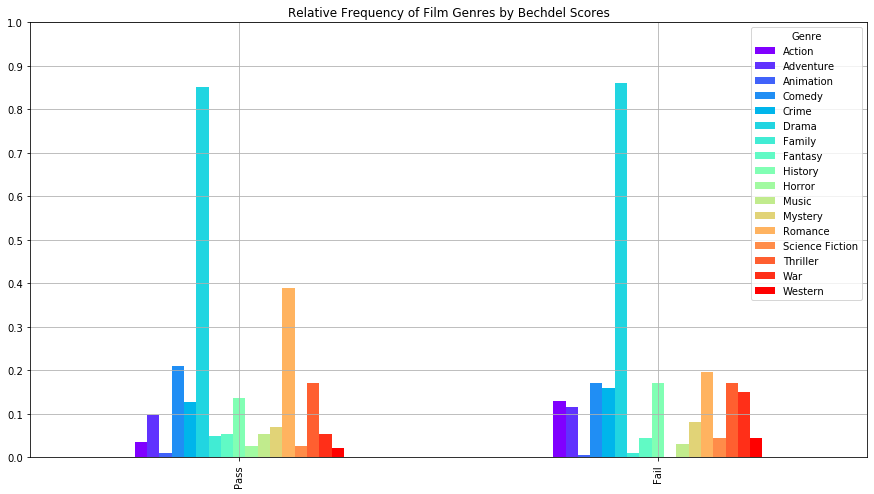

In [11]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 8)

#creates a plot comparing the frequency of each genre of films that pass the test vs. of films that do not pass the test
def bechdel_genre_graph(df):
    # divides full movie data into two data frames, one for films that pass the bechdel test, one for those that fail
    # films with no bechdel scores are not included
    bechdel_pass = df[df['Bechdel Pass'] == True ] # all the films that pass the Bechdel test
    bechdel_fail = df[df['Bechdel Pass'] == False ] # all the films that fail the Bechdel test
    
    pass_count = len(bechdel_pass)
    fail_count = len(bechdel_fail)

    pass_genres = []
    for row in bechdel_pass['Genres']:
        for word in row:
            pass_genres.append(word)
        
    pass_rel = (pd.DataFrame(pass_genres, columns = ['Pass'])['Pass'].value_counts() / pass_count).to_frame()
    
    fail_genres = []    
    for row in bechdel_fail['Genres']:
        for word in row:
            fail_genres.append(word)

    
    fail_rel = (pd.DataFrame(fail_genres, columns = ['Fail'])['Fail'].value_counts() / fail_count).to_frame()
  
    # genre relative frequency plot
    df_rel = pd.merge(pass_rel,fail_rel,how='outer', left_index = True, right_index = True)
    df_rel = df_rel.fillna(0)
    df_rel.index.name = 'Genre'
    df_rel = df_rel.T
    yticks = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    df_rel.plot(kind='bar', title='Relative Frequency of Film Genres by Bechdel Scores', grid=True, colormap = 'rainbow', yticks=yticks)

bechdel_genre_graph(movies)



In [12]:
# splits list of genres for each film into individual records
def split_genres(df):
    
    film = []
    genre = []
    score = []
    for row in df.iterrows():
        title = row[1]['Title']
        test = row[1]['Bechdel Pass']
        if test == True:
            test = 'Pass'
        elif test == False:
            test = 'Fail'
        else:
            continue
        genre_list = row[1]['Genres']
        for g in genre_list:
            film.append(title)
            score.append(test)
            genre.append(g)
    return pd.DataFrame(zip(film,score,genre), columns=['Film','Score','Genre'])


#creates an Altair plot comparing the frequency of each genre of films that pass the test vs. of films that do not pass the test
def bechdel_genre_graph2(df):
    genres = split_genres(df)
    a = alt.Chart(genres).mark_bar().encode(
        x = alt.X('count(Film)', stack='normalize'),
        y = 'Genre',
        color = 'Score'
    ).properties(height=400, width=400, title = 'Relative Frequency of Bechdel Scores by Film Genre' )
    return a
    
bechdel_genre_graph2(movies)

NameError: name 'alt' is not defined

Analysis:

This first graph depicts the proportion of films that were tagged as each genre, separated by their score on the Bechdel Test. For instance, over 90% of Oscar-nominated and Golden Globes-nominated films failing the Bechdel Test were tagged as 'Drama'. The second graph depicts the proportions, within a given genre, of films passing and failing the Bechdel Test.

Key insights from these graphs include:
* Only approximately 20% of films failing the Bechdel Test were tagged as 'Romance,' but nearly 40% of films passing the Bechdel Test had this tag. Based on the second graph, around 68% percent of films tagged as 'Romance' passed the Bechdel test. This reinforces the idea that romantic themes are more heavily associated with the presence of women. 
* Based on the first graph, while the 'Sport' genre has a relatively low presence among nominated films, of the films that were tagged as 'Sport' films, about 90% did not pass the Bechdel Test. This suggests that women may have very little representation in sports films. 
* Similarly, 'War' films have a significant presence among Oscar-nominated films, but over 70% of the 'War' films did not pass the Bechdel Test. As suggested by the wordclouds above as well, women may also lack representation in films associated with topics of war. 
* Based on the second graph, the film genres with notably large proportions of films not passing the Bechdel Test are: Action, Film Noir, War, Western, and Sport. All of these categories are stereotypically not societally associated with women, and these results show that the same may hold true in film, even internationally recognized films.


# Machine Learning Experiments

## Using Logistic Regression to Predict the Bechdel Scores of Films

Training Data: 
- Input: 0 or 1 for each of the 17 possible genres indicating which genres describe a film, the number of females in the cast, and the number of top ranking females, the year of the film
- Output: 0 or 1, indicating whether a film fails or pass the Bechdel 
test, respectively

In [ ]:
# must run cells with no_of_females and no_topranking_females columns first
genres = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama', 'Family',
          'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
          'Thriller', 'War', 'Western']

# returns input and output for testing and training data
def process_bechdel_input_data(df):
    cond1 = df['Bechdel Pass'] == True
    cond2 = df['Bechdel Pass'] == False
    bechdel_films = df[cond1 | cond2]
    
    data_count = len(bechdel_films.index)
    testing_count = int(0.10*data_count)
    training_count = data_count - testing_count
    
    training_indices = random.sample(range(data_count),training_count)
    # first 17 entries are 0/1 indicators of genre, 18th entry is number of female cast members, 
    # 19th is number of top rank females, 20th is year
    training_input = np.zeros(shape=(training_count, 20))
    training_output = np.zeros(shape=training_count)
    testing_input = np.zeros(shape=(testing_count,20))
    testing_output = np.zeros(shape=testing_count)
    
    i = 0
    test = 0
    train = 0
    for row in bechdel_films.iterrows():
        # add data point to training set
        if i in training_indices:
            # set output value
            score = row[1]['Bechdel Pass']
            if score is True:
                training_output[train] = 1

            # set input genre features
            genres = row[1]['Genres']
            for g in genres:
                index = genres.index(g)
                training_input[train][index] = 1

            # set input number of females
            training_input[train][17] = row[1]['no_of_females']
            training_input[train][18] = row[1]['no_of_toprank_females']

            # set input year
            training_input[train][19] = row[1]['Year']
            train += 1
        # add data point to testing set
        else:
            # set output value
            score = row[1]['Bechdel Pass']
            if score is True:
                testing_output[test] = 1

            # set input genre features
            genres = row[1]['Genres']
            for g in genres:
                index = genres.index(g)
                testing_input[test][index] = 1

            # set input number of females
            testing_input[test][17] = row[1]['no_of_females']
            testing_input[test][18] = row[1]['no_of_toprank_females']

            # set input year
            testing_input[test][19] = row[1]['Year']
            test += 1
            
        i += 1

    return training_input, training_output, testing_input, testing_output

train_input, train_output, test_input, test_output = process_bechdel_input_data(movies)

bechdel_model = LogisticRegression(solver='liblinear', random_state=0).fit(train_input,train_output)
print("Model Accuracy Rate on Testing Data: " + str(100*bechdel_model.score(test_input,test_output))[0:4] + "%")
c_matrix = confusion_matrix(test_output, bechdel_model.predict(test_input))
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(c_matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Fails', 'Predicted Passes'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Fails', 'Actual Passes'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, c_matrix[i, j], ha='center', va='center', color='brown')
plt.show()
print("Precision: ", str(100.0*c_matrix[1][1]/(c_matrix[1][1]+c_matrix[0][1]))[0:4]+'%')
print("Recall: ", str(100.0*c_matrix[1][1]/(c_matrix[1][1]+c_matrix[1][0]))[0:4]+'%')

The logistic regression model above attempts to predict the Bechedel Test scores (Pass or Fail) of films based on these input features: the genre(s) of the film, the number of females in the cast, the number of female lead roles, and the year of the film. As suggested by graphs above, it appears that some genres of film are more likely to have films passing the test, and probabilistically, the more women that are in the cast, and the more female lead roles there are, the more likely it is that the film meets the three criteria of the Bechdel Test. The year may also be indicative of the level of representation of women in a film. Though these input features seemed among the most relevant, the model generally produced between 60-70% accuracy, which is not much better than random assignment. A possible reason for this may be that we only had around 425 data points in our dataset, out of which 10% were set aside to test the model. Performance might improve if the model had more training data, perhaps not limited to just award-winning films, though the award-winning quality itself may be a relevant feature. Furthermore, this may suggest that the Bechdel score of a film may in fact have to be qualitatively/manually determined. While certain genres and numbers of female actors can improve the chances of a film passing the test, they do not guarantee that all three criteria will be met, namely the last two: two women must talk to each other, and about something other than a man. Machine learning applied to script analysis may be more telling in this case. 

#### K-means with Correlations between No of Females in a Film and Rotten Tomatoes Critics' Ratings

In [5]:
from sklearn.cluster import KMeans

Input- no of females

Output- rating score

Elbow Method to Determine No of Clusters

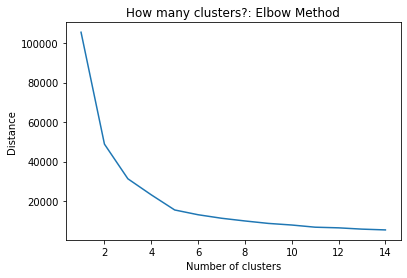

In [8]:
dist = []
#remove -1 (no score available) from data set
temp_set = movies[movies['Tomatometer']!= -1]
final_score = temp_set[['Tomatometer', 'no_of_females']]
X = final_score

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    dist.append(kmeans.inertia_)
plt.plot(range(1, 15), dist)
plt.title('How many clusters?: Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distance')
plt.show()

No of clusters: elbow at ~3

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
[[93.18313953  7.5377907 ]
 [41.27272727  5.54545455]
 [77.46153846  7.13609467]]


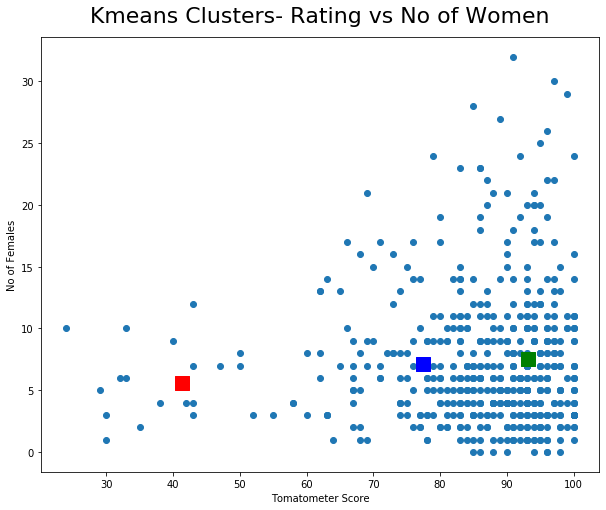

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0,
       2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 0, 0, 2,
       2, 1, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 2,
       0, 2, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0,
       0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2,
       0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2,

In [11]:
#finding centroids
kmeans = KMeans(n_clusters=3)
print(kmeans.fit(X))

c_pts = kmeans.cluster_centers_
print(c_pts)

plt.figure(figsize=(10,8))
plt.scatter(X['Tomatometer'], X['no_of_females'])
plt.scatter(c_pts[0][0], c_pts[0][1], s=200, c='green', marker='s')
plt.scatter(c_pts[1][0],c_pts[1][1], s=200, c='red', marker='s')
plt.scatter(c_pts[2][0],c_pts[2][1], s=200, c='blue', marker='s')

#styling 
plt.xlabel("Tomatometer Score")
plt.ylabel("No of Females")
plt.title("Kmeans Clusters- Rating vs No of Women", y=1.02, fontsize=22);

plt.show()

#uncomment to show pts+clusters:
kmeans.labels_

Disclaimer: The data is already mostly concentrated in a range of high ratings and low women. 

In [28]:
##Find Cluster Correlations for Winners vs Nominations: 

#winners
winners = temp_set[temp_set["Oscar Winner"] == 1]
winners = winners[['Tomatometer', 'no_of_females']].values.tolist()
#print(winners)
result = kmeans.predict(winners)
result_df = pd.DataFrame(result)
print(result_df.mode())


winners_gg = temp_set[temp_set["Golden Globes Winner"] == 1]
winners_gg = winners_gg[['Tomatometer', 'no_of_females']].values.tolist()
result_gg = kmeans.predict(winners_gg)
result_gg_df = pd.DataFrame(result_gg)
print(result_gg_df.mode())


losers = temp_set[temp_set["Golden Globes Winner"] == 0]
losers = losers[['Tomatometer', 'no_of_females']].values.tolist()
losers_gg = kmeans.predict(losers)
losers_gg_df = pd.DataFrame(losers_gg)
print(losers_gg_df.mode())


   0
0  0
   0
0  0
   0
0  0


Our data shows that the relationship between gender and critic scores in predicting winners for Oscars does not yield accurate results.This disproves our original hypothesis of a correlation between critic ratings/gender and winning films.

# Conclusion

## Comparison with Existing Work

Films, especially films that are recognized in the Oscars and the Golden Globes, are a heavily studied area. There has been considerable research, too, on the gender biases and representation of women in film. However, some ways in which our project differs from much of the existing work in the area are:
* Keyword analysis providing a visual representation of the topical distribution of films passing the Bechdel Test vs. films failing the Bechdel Test


## Evaluation of Results and Insights

### Key Insights

Some of the key insights we gained from this exploration into recognized film data, as described above in detail, include:
* There is a notable difference in the distribution of topical themes and genres of films that pass the Bechdel Test compared to the that of films that do not pass the test. This suggests that even films meeting the test's rather rudimentary criteria for representation women, still primarily focus on topics that are stereotypically associated with women, like love, relationships, or family. The results indicate that representation of women is relatively lacking in films associated with career and education topics, violence and war, and sports.

### Potential Additions and Improvements

While the logistic regression model developed to predict Bechdel scores of films did provide prediction value, additional improvments could be made. With additional time and computing power, we would use all 8076 films for which Bechdel scores are available as the training data to increasing the accuracy of the model's predictions. 

For this project, we were largely limited by the features of films that were accessible through freely available APIs and datasets. With access to more telling features of films, we could delve deeper into our analyses of the characteristics of recognized films, as well as have more thorough training data to inform a large variety of machine learning models. For instance, we were not able to find a publicly available, comprehensive dataset on actors' races, but given this data, we could further analyze the racial representation of recongized films. 

Another avenue we would consider with additional time would be natural language processing using movie scripts. Building off of existing work in sentiment and connotation analysis of movie scripts, we could analyze the differences in language, speaking time and character agency among varying character demographics and between movies. 

## Sources and Acknowledgements 

1. **Pre-existing data sets from IMDb (i.e. BestPictureAcademyAwards.csv, Top1000Actors.csv)**
2. **Pre-existing Golden Globes dataset from Kaggle:** https://www.kaggle.com/unanimad/golden-globe-awards
3. **The Movie Database API (information collected from IMDb):** 
https://developers.themoviedb.org/3/getting-started/introduction 
4. **Webscraping for Bechdel Rankings from:** https://bechdeltest.com/. 
5. **Rotten Tomatoes Client/ Github-unofficial** https://github.com/jaebradley/rotten_tomatoes_client

Packages:
* pandas, matplotlib, altair, random, scikit-learn, seaborn, numpy
* wordcloud from https://github.com/amueller/word_cloud
